## Parking/Charging Event Sampling
- of parking types
- of parking garages (share of parking types)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import holidays

# ML/Clustering stuff
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# CONFIG

DATA_PATH = "/Volumes/karsten.schroer@uni-koeln.de/Uni/Research/04_CASE_Clustered_EV_Charging/"
OUT_PATH = ""
HOLIDAY_YEARS = [2019, 2020]

In [3]:
parkings = pd.read_csv(DATA_PATH+"EV_Energy_Demand_Data/Parking+Charging_Data_BLENDED_CLUSTERED.csv")

In [4]:
parkings.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,EntryDateTime,ExitDateTime,HoursStay,MinutesStay,RevenueAmount,SiteID,Year,...,EntryDayOfWeek,EntryWeekday_yn,EntryHoliday_yn,userInputs_WhPerMile,userInputs_kWhRequested,userInputs_milesRequested,MaxFeasible_kwhRequested,final_kWhRequested,ClusterNum,ClusterName
0,0,0,1,2019-01-02 06:26:52,2019-01-02 15:52:40,9.433333,566,0.0,Facility_1,2019,...,2,1,0,429.166667,18.416667,50.000000,207.533326,18.416667,0,Business
1,1,1,2,2019-01-02 06:27:23,2019-01-02 07:46:57,1.316666,79,2.5,Facility_1,2019,...,2,1,0,387.500000,10.833333,30.833333,28.966652,10.833333,0,Business
2,2,2,3,2019-01-02 06:27:46,2019-01-02 14:24:52,7.950000,477,0.0,Facility_1,2019,...,2,1,0,351.000000,27.031667,84.000000,174.900000,27.031667,0,Business
3,3,3,4,2019-01-02 06:27:56,2019-01-02 15:09:13,8.700000,522,0.0,Facility_1,2019,...,2,1,0,376.000000,28.324167,83.333333,191.400000,28.324167,0,Business
4,4,4,5,2019-01-02 06:29:50,2019-01-02 16:33:44,10.066666,604,0.0,Facility_1,2019,...,2,1,0,430.083333,36.521667,81.666667,221.466652,36.521667,0,Business


In [5]:
#cluster proposerties

In [10]:
perc = parkings[["ClusterName","EntryDateTime"]].groupby("ClusterName").count()
perc["Share"] = perc["EntryDateTime"]/len(parkings)

In [11]:
perc

,EntryDateTime,Share
ClusterName,,
Afternoon_short,985710,0.256494
Business,671384,0.174703
Evening_short,744753,0.193794
Long-term,32241,0.008390
Morning_short,1279646,0.332980
Overnight,129273,0.033639


In [12]:
len(parkings)

3843007

In [8]:
# plotting

from datetime import time
# this is a Tueasday
parkings["date"] = parkings["EntryDateTime"].apply(lambda x: pd.to_datetime(x).date())

In [33]:
date = pd.to_datetime("2019-06-10") 

In [34]:
parkings_day_facility_6 = parkings[(parkings["SiteID"]=="Facility_6")&(parkings["date"]==date)]
parkings_day_facility_4 = parkings[(parkings["SiteID"]=="Facility_4")&(parkings["date"]==date)]
parkings_day_facility_3 = parkings[(parkings["SiteID"]=="Facility_3")&(parkings["date"]==date)]

In [35]:
len(parkings_day_facility_6)

23

<BarContainer object of 5 artists>

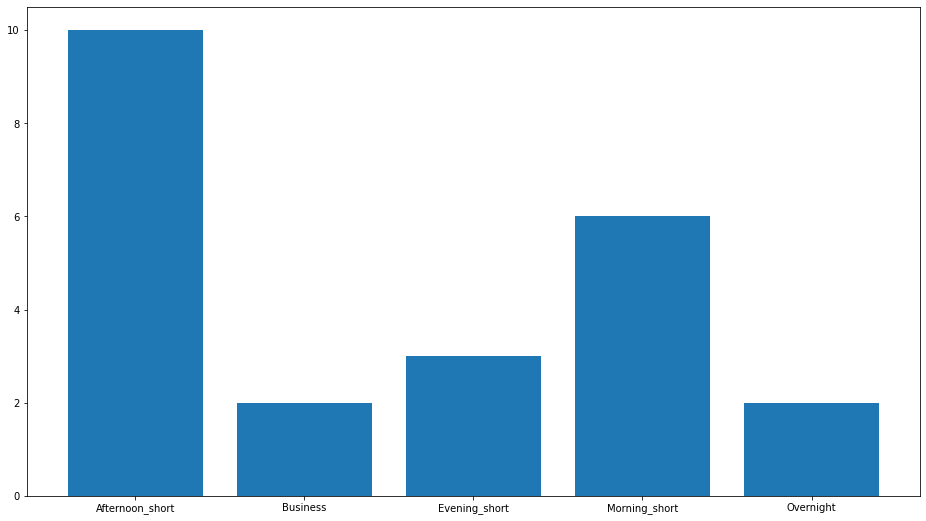

In [36]:
raw_cluster_proportions = parkings_day_facility_6.groupby("ClusterName",as_index=False).count()
fig,ax=plt.subplots(figsize=(16,9))
ax.bar(x=raw_cluster_proportions["ClusterName"],height=raw_cluster_proportions["EntryDateTime"])

<BarContainer object of 5 artists>

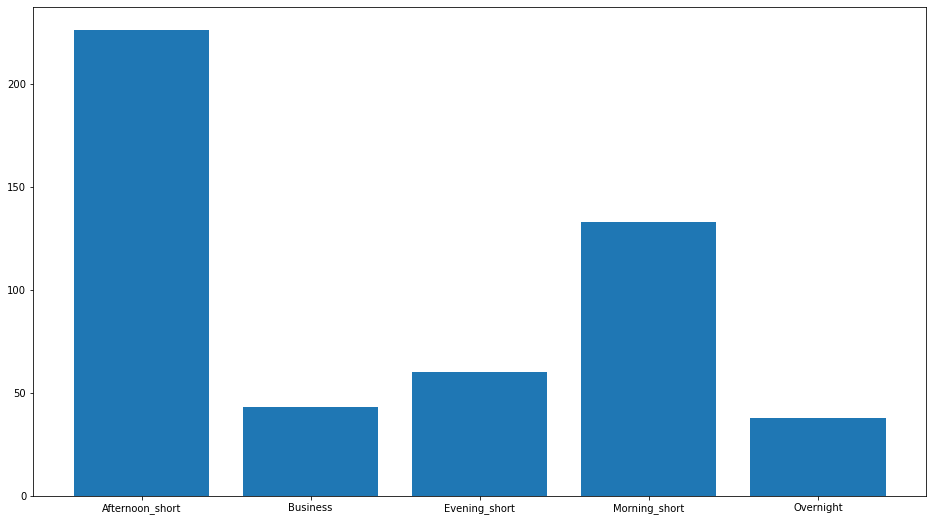

In [38]:
sampled_cluster_proportions = parkings_day_facility_6.sample(n=500,replace=True).groupby("ClusterName",as_index=False).count()
fig,ax=plt.subplots(figsize=(16,9))
ax.bar(x=sampled_cluster_proportions["ClusterName"],height=sampled_cluster_proportions["EntryDateTime"])

Sampling works great in replicating shares. But what can we say about max. occupation?

Which dates to select to run the sim for?
- Winter: 21-25 October, 2019
- Summer: 3-7. June, 2019

In [49]:
date_lower = pd.to_datetime("2019-10-01") 
date_upper = pd.to_datetime("2019-10-27") 

In [50]:
parkings["EntryDateTime"] = pd.to_datetime(parkings["EntryDateTime"])

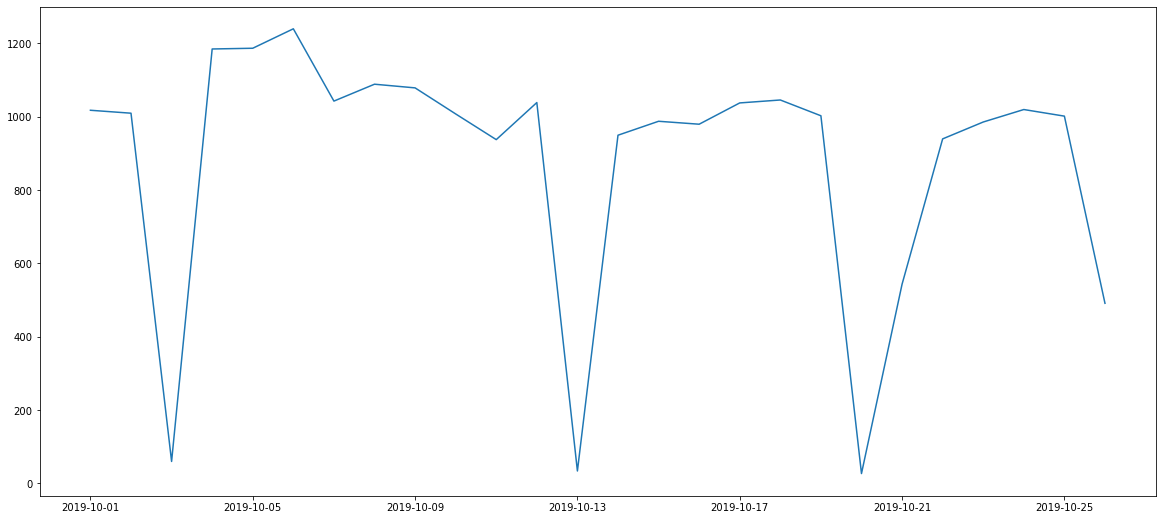

In [51]:
#for fac in ["Facility_6","Facility_4","Facility_3"]:
    
data = parkings[(parkings["SiteID"]=="Facility_6")&(parkings["EntryDateTime"]>=date_lower)&(parkings["EntryDateTime"]<date_upper)][["date","EntryDateTime"]]

data_grp=data.groupby("date",as_index=False).count()

fig, ax = plt.subplots(figsize=(20,9))

ax=plt.plot(data_grp["date"],data_grp["EntryDateTime"])

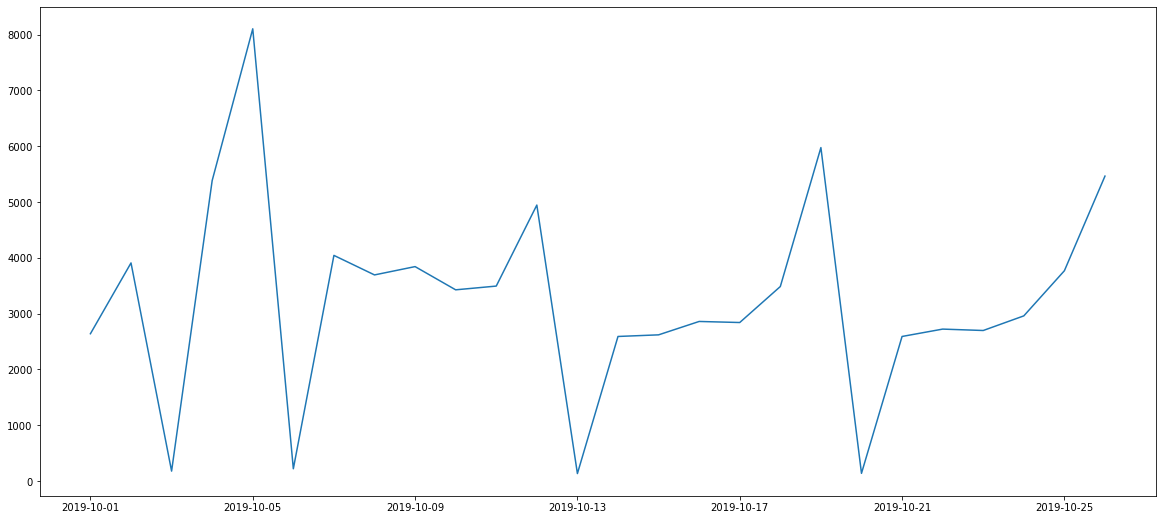

In [52]:

data = parkings[(parkings["SiteID"]=="Facility_4")&(parkings["EntryDateTime"]>=date_lower)&(parkings["EntryDateTime"]<date_upper)][["date","EntryDateTime"]]



data_grp=data.groupby("date",as_index=False).count()

ffig, ax = plt.subplots(figsize=(20,9))

ax=plt.plot(data_grp["date"],data_grp["EntryDateTime"])

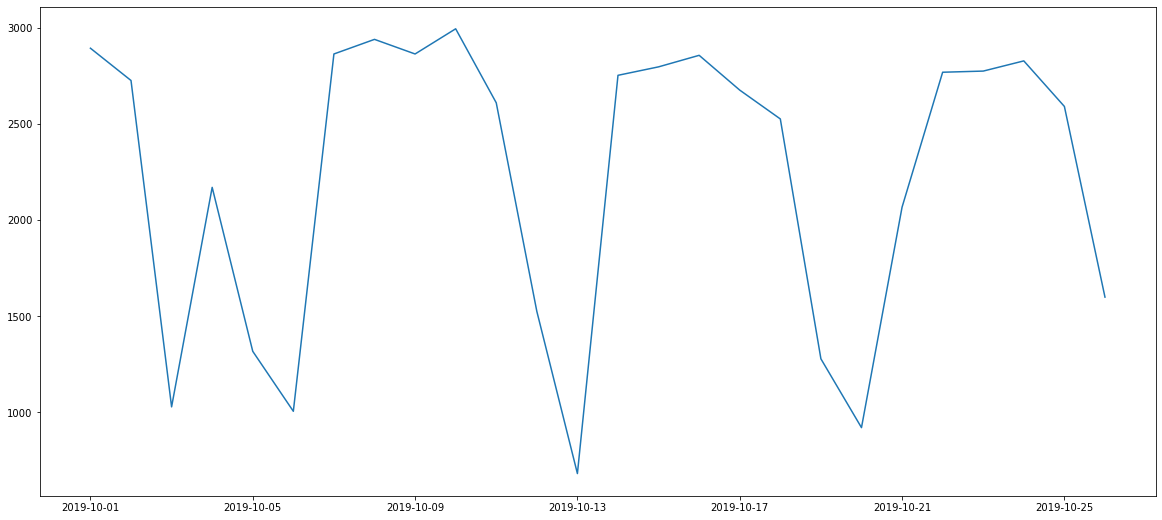

In [53]:
data = parkings[(parkings["SiteID"]=="Facility_3")&(parkings["EntryDateTime"]>=date_lower)&(parkings["EntryDateTime"]<date_upper)][["date","EntryDateTime"]]



data_grp=data.groupby("date",as_index=False).count()



fig, ax = plt.subplots(figsize=(20,9))

ax=plt.plot(data_grp["date"],data_grp["EntryDateTime"])